<h1>Customer Segmentation and Effective Cross Selling</h1>
<b>Customer segmentation: Customer segmentation is the problem of uncovering information about a firm’s customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.</b>
</br></br><b>Market basket analysis: Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.</b>
</br></br>The dataset we will be using for our analysis is quite
simple. Based on its description on the UCI web site, it contains all the
transactions occurring between 01/12/2010 and 09/12/2011 for a
UK-based and registered non-store online retail. From the web site, we also
learn that the company sells unique all-occasion gift items and a lot of
customers of the organization are wholesalers.

</br></br>The last piece of information is particularly important as gives us an
opportunity to explore purchase behaviors of large-scale customers instead
of normal retail customers only. The dataset does not have any information
that will help us distinguish between a wholesale purchase and a retail
purchase. Before we get started, make sure you load the following
dependencies.

In [1]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

<h2>Exploratory Data Analysis</h2>
</br>The first thing you should notice about the dataset is its format. Unlike
most of the datasets that we have handled in this book the dataset is not in a
CSV format and instead comes as an Excel file. In some other languages (or
even frameworks) it could have been a cause of problem but with python
and particularly pandas we don’t face any such problem and we can read
the dataset using the function read_excel provided by the pandas
library. We also take a look at some of the lines in the dataset.

In [2]:
cs_df = pd.read_excel(io='Online Retail.xlsx')

In [3]:
cs_df.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [4]:
cs_df.Country.value_counts().reset_index().head(10)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


This shows us that the bulk of ordering is taking place in its home
country only which is not surprising. We also notice the odd country name
EIRE, which is a little concerning. But a quick web search indicates that it
is just an old name for Ireland, so no harm done! Interestingly, Australia is
also in the top-ten list of sales by country.
Next we might be interested in how many unique customers the retailer
is having and how do they stack up in the number of orders they make. We
are also interested in knowing that what percentage of orders is made by the
top 10 customers of the retailer. This information is interesting as it would
tell us whether the user base of the firm is distributed relatively uniformly.

In [5]:
cs_df.CustomerID.unique().shape

(4373,)

In [6]:
# Finding the trade quantity in percentage of each customer
(cs_df.CustomerID.value_counts()/sum(cs_df.CustomerID.value_counts())*100).head(n=13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

This tells us that we have 4,373 unique customers but almost 10% of
total sales are contributed by only 13 customers (based on the cumulative
percentage aggregation in the preceding output). This is expected given the
fact that we have both wholesale and retail customers. The next thing we
want to determine is how many unique items the firm is selling and check
whether we have equal number of descriptions for them.

In [7]:
cs_df.StockCode.unique().shape

(4070,)

In [8]:
cs_df.Description.unique().shape

(4224,)

This tells us that we have 4,373 unique customers but almost 10% of
total sales are contributed by only 13 customers (based on the cumulative
percentage aggregation in the preceding output). This is expected given the
fact that we have both wholesale and retail customers. The next thing we
want to determine is how many unique items the firm is selling and check
whether we have equal number of descriptions for them.

In [9]:
cat_des_df = cs_df.groupby(["StockCode","Description"]).count().reset_index()

In [10]:
cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1].reset_index()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5
...,...,...
645,23390,2
646,23212,2
647,23542,2
648,23543,2


<h3>Example of one such stockcode</h3>

In [11]:
cs_df[cs_df['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1].reset_index()['index'][5]]['Description'].unique()

array(['SET/3 ROSE CANDLE IN JEWELLED BOX', 'wet pallet', 'damages',
       '???missing', 'AMAZON'], dtype=object)

In [12]:
cs_df['invdatetime'] = pd.to_datetime(cs_df.InvoiceDate)

In [13]:
cs_df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [14]:
cs_df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

<h3>Data Cleaning</h3>

In [15]:
# Seprate data for one geography
cs_df = cs_df[cs_df.Country=='United Kingdom']

# Seprate attribute for total amount
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice

# Remove negative or return transactions
# The below conditions is been fullfiled by many of the test cases, as we got the mean of the quantity in -ve which is not possible, Hence they are there are also the return
# quantity of goods also, We have to remove it, Also we have the min of price in -ve, Which is not possible
cs_df = cs_df[~(cs_df.amount<0)]
cs_df.head()
cs_df = cs_df[~(cs_df.CustomerID.isnull())]

/tmp/ipykernel_11165/1783447032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice


In [16]:
cs_df.shape

(354345, 10)

<h3>Build Recency Feature</h3>
</br>Recency: How recently a customer has made a purchase. Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on purchases.

In [17]:
cs_df.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [18]:
cs_df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [19]:
refrence_date = cs_df.InvoiceDate.max()
# Timedeltas are differences in times, expressed in difference units, e.g. days, hours, minutes, seconds. They can be both positive and negative.
refrence_date = refrence_date + datetime.timedelta(days = 1)

In [20]:
cs_df['days_since_last_purchase'] = refrence_date - cs_df.InvoiceDate
cs_df['days_since_last_purchase_num'] = cs_df['days_since_last_purchase'].astype('timedelta64[D]')

<h3>Time Period Of Transactions</h3>

In [21]:
customer_history_df = cs_df.groupby("CustomerID").min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
customer_history_df.rename(columns={'days_since_last_purchase_num':'recency'}, inplace=True)
customer_history_df.recency.describe()

/tmp/ipykernel_11165/595029647.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  customer_history_df = cs_df.groupby("CustomerID").min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]


count    3921.000000
mean       92.188472
std        99.528995
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: recency, dtype: float64

In [22]:
customer_history_df.head()

,CustomerID,recency
0,12346.0,326.0
1,12747.0,2.0
2,12748.0,1.0
3,12749.0,4.0
4,12820.0,3.0


In [23]:
customer_history_df.recency.describe()

count    3921.000000
mean       92.188472
std        99.528995
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: recency, dtype: float64

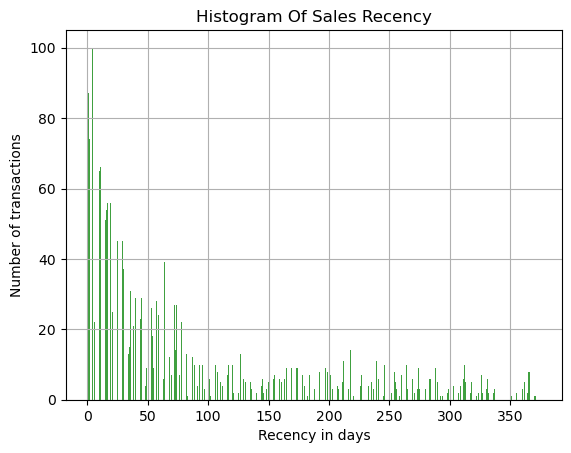

In [24]:
x = customer_history_df.recency
mu = np.mean(customer_history_df.recency)
sigma = math.sqrt(np.var(customer_history_df.recency))
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram Of Sales Recency')
plt.grid(True)

<b><b>Build Frequency & Monetary Value Fratures</b></b>

In [25]:
customer_monetary_val = cs_df[['CustomerID', 'amount']].groupby('CustomerID').sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val, how='outer')
customer_history_df.amount = customer_history_df.amount+0.001
customer_freq = cs_df[['CustomerID', 'amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'amount':'frequency'}, inplace=True)
customer_history_df = customer_history_df.merge(customer_freq, how='inner')

In [26]:
customer_history_df.head()

,CustomerID,recency,amount,frequency
0,12346.0,326.0,77183.601,1
1,12747.0,2.0,4196.011,103
2,12748.0,1.0,33719.731,4596
3,12749.0,4.0,4090.881,199
4,12820.0,3.0,942.341,59


In [32]:
from sklearn import preprocessing
import math

customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = (customer_history_df[feature_vector].to_numpy())
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

<b><b>Visualizing Recency vs Monetary Value (scaled)</b></b>

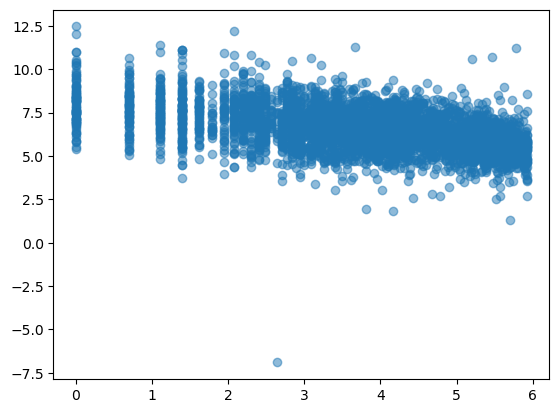

In [33]:
plt.scatter(customer_history_df.recency_log, customer_history_df.amount_log, alpha=0.5)

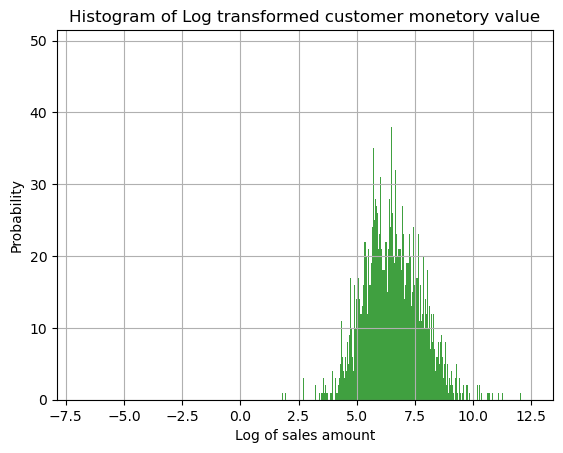

In [34]:
x = customer_history_df.amount_log
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75)

plt.xlabel('Log of sales amount')
plt.ylabel('Probability')
plt.title('Histogram of Log transformed customer monetory value')
plt.grid(True)

In [35]:
customer_history_df.head()

,CustomerID,recency,amount,frequency,recency_log,frequency_log,amount_log
0,12346.0,326.0,77183.601,1,5.786897,0.000000,11.253942
1,12747.0,2.0,4196.011,103,0.693147,4.634729,8.341890
2,12748.0,1.0,33719.731,4596,0.000000,8.432942,10.425838
3,12749.0,4.0,4090.881,199,1.386294,5.293305,8.316516
4,12820.0,3.0,942.341,59,1.098612,4.077537,6.848367


Text(0.5, 0, 'Monetary')

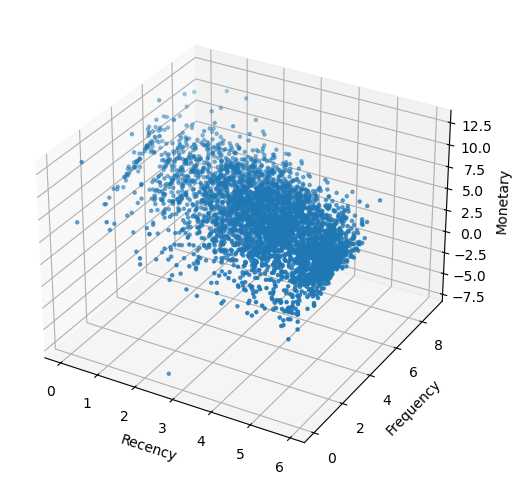

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

<b><b>Analyze Customer Segments with Clustering</b></b>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm import cm

x = X_scaled

cluster_centers = dict()

for n_cluster in range(3, 6, 2):
    fig, (ax1, ax2) = plt.subplot(1, 2)